

Hierarchical Clustering
This hands-on exercise will guide students through the basics of Hierarchical Clustering using Python. The lab uses a real dataset, lets students visualize the dendrogram, and helps them interpret and apply clustering results.



In [1]:
# 1. Setup: Import Required Libraries
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.preprocessing import StandardScaler

In [2]:


# 2. Load and Prepare the Dataset
# For this exercise, we'll use the classic Iris dataset.
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
# Optional: Standardize the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)


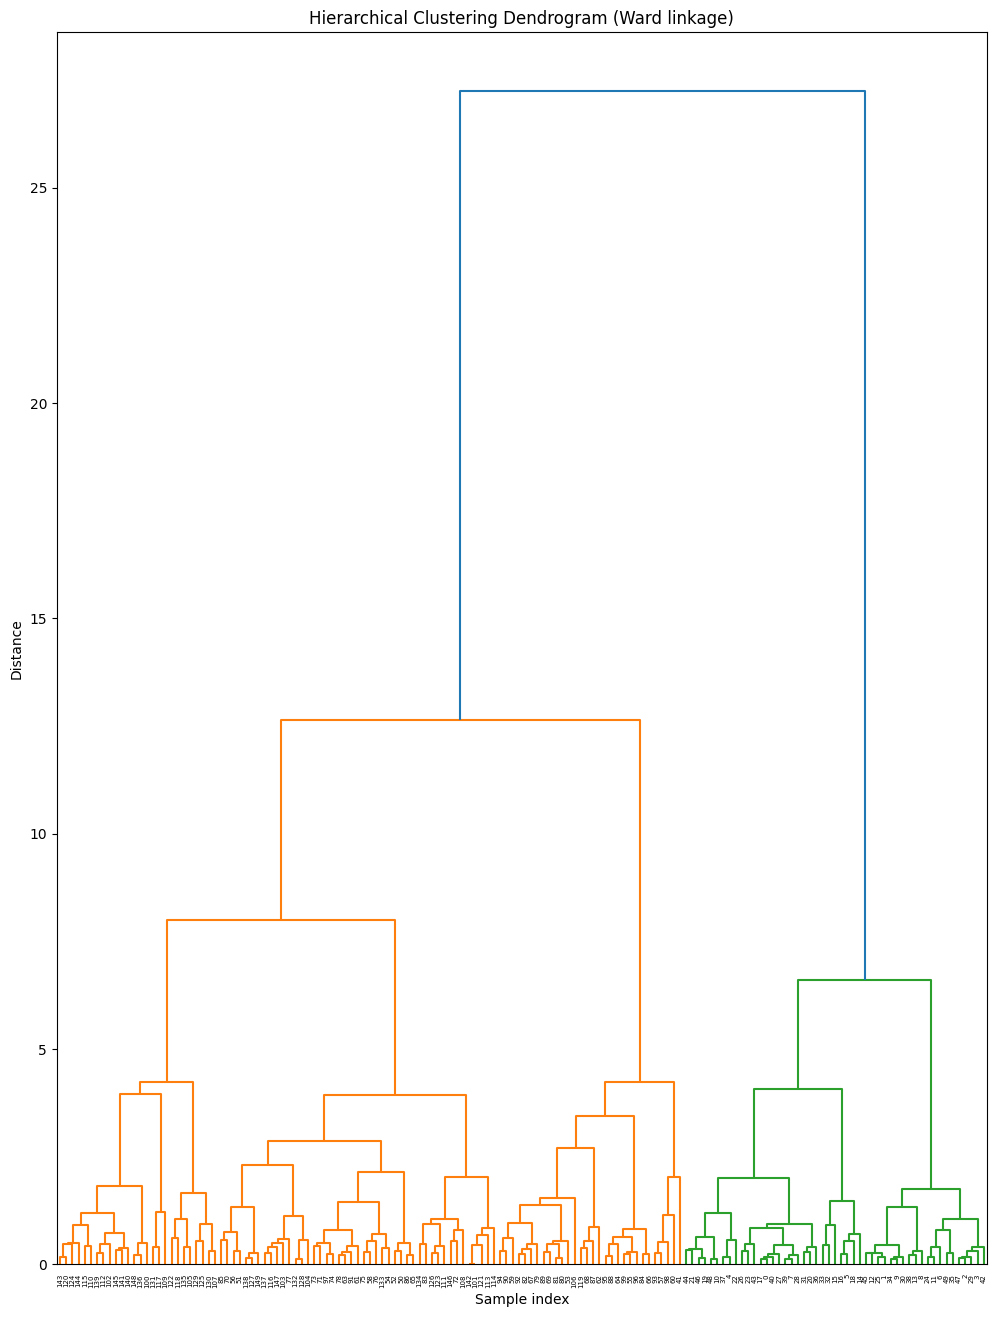

In [8]:


# 3. Compute Linkage Matrix & Plot Dendrogram
# Compute the linkage matrix using Ward's method
linked = linkage(scaled_data, method='ward')

plt.figure(figsize=(12, 16))
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram (Ward linkage)')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

In [6]:

# 4. Choose Number of Clusters & Assign Labels
#Let’s say we want to create 3 clusters:
num_clusters = 6
labels = fcluster(linked, num_clusters, criterion='maxclust')
df['cluster'] = labels
print(df['cluster'].value_counts())

cluster
5    45
2    29
6    26
4    25
1    20
3     5
Name: count, dtype: int64


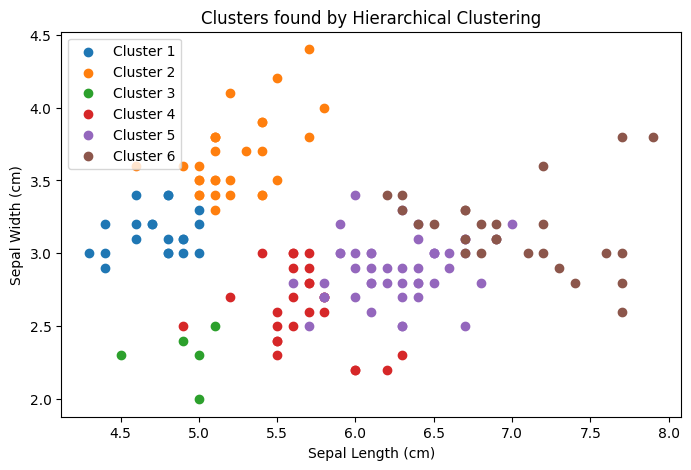

In [7]:


# 5. Visualize the Clusters
# We'll use the first two features for a quick cluster plot:
plt.figure(figsize=(8, 5))
for cluster in range(1, num_clusters+1):
    plt.scatter(df[df['cluster']==cluster]['sepal length (cm)'],
                df[df['cluster']==cluster]['sepal width (cm)'],
                label=f'Cluster {cluster}')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Clusters found by Hierarchical Clustering')
plt.legend()
plt.show()

